# Denoising by Delaunay triangulation on zeros

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.method_delaunay_triangulation import delaunay_triangulation_denoising, block_based_dt_denoising

In [2]:
# np.random.seed(10)
# signal parameters
SNRin = 30
N = 2**13
# Nsub = 2**12
sbank = SignalBank(N=N,)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_linear_chirp()
# s = sbank.signal_mc_parallel_chirps_unbalanced()
# s = sbank.signal_mc_parallel_chirps()

# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_double_cos_chirp()
# s = sbank.signal_mc_on_off_tones()
s = sbank.signal_mc_synthetic_mixture_4() # Mala.
# s = sbank.signal_hermite_function()
# s = sbank.signal_mc_multi_cos_2()

signal, noise = add_snr(s,SNRin, complex_noise=False)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:30.0


C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-denoising\src\benchmark_demo\SignalBank.py:1245: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


0
Block: 1
768
Block: 2
1536
Block: 3
2304
Block: 4
3072
Block: 5
3840
Block: 6
4608
Block: 7
5376
Block: 8
6144
Block: 9
6912
Block: 10
7680
Block: 11
Invertion...


C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-denoising\src\benchmark_demo\utilstf.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  x[icol]=x[icol]+tfr[indices,tj]*window[Lh+tau]


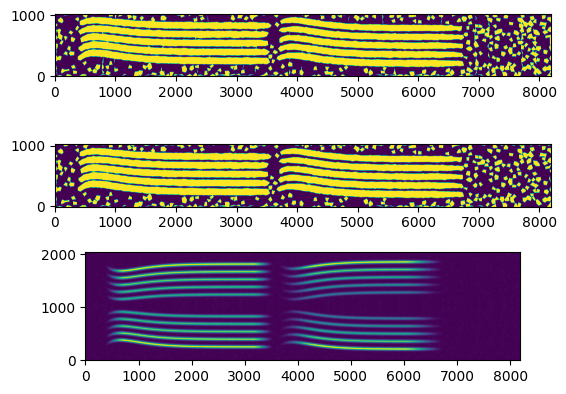

In [3]:
# Nfft = 2*N
# g,T = get_round_window(Nfft)
# Lx = Nfft/T
# S, F, stft_padded, Npad = get_spectrogram(signal, window = g)

mask, stft, signal_output = block_based_dt_denoising(signal,
                                block_len=1024,
                                grouping = False,
                                min_group_size=5,
                                LB = 1.6,
                                )

output = delaunay_triangulation_denoising(signal,
                                return_dic=True,
                                grouping = False,
                                Nfft = 2*1024,
                                # min_group_size=5,
                                LB = 1.6,
                                )                               

signal_output2, mask2, _, _, _ = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )

#  = block_based_dt_denoising(signal,block_len=1024)

fig, axs = plt.subplots(3,1)
axs[0].imshow(mask, origin='lower')
axs[1].imshow(mask2, origin='lower')
axs[2].imshow(np.abs(stft), origin='lower')


In [4]:
# F_output, _, _, _ = get_spectrogram(signal_output, window = g)
print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output)**2))))

33.12811743027531


NameError: name 'F_output' is not defined

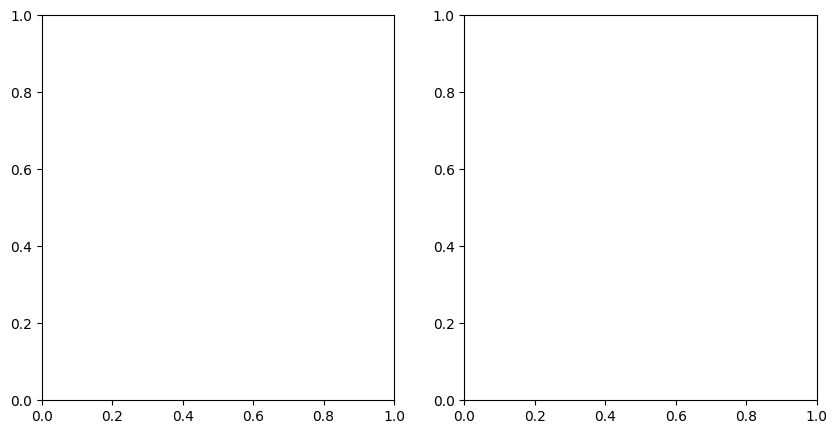

In [5]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
# ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

# ax[0].plot(signal.instf[0]*Nfft,'r')
# ax[0].plot(signal.instf[1]*Nfft,'r')
# ax[0].plot(signal.instf[2]*Nfft,'r')
plt.show()